First, clean and organize the /content folder and turn it into a git repository.

In [1]:
# remove sample_data file 
%%bash
rm -r sample_data
ls

In [2]:
# create the .gitignore
%%bash
cat > .gitignore
.*
.gitignore

In [3]:
# set my own identity with git config
%%bash
git config --global user.email "xli87898@usc.edu"
git config --global user.name "edd-lxy"

In [4]:
# turn the folder into git repository
%%bash
git init

Initialized empty Git repository in /content/.git/


Create organized repository structure

In [5]:
# create subdirectories under /content folder
%%bash
mkdir startingData code results figures
ls


code
figures
results
startingData


In [6]:
# Create a README file inside the /content folder to demonstrate what this repository is for
%%bash
pwd
cat > README.md
startingData contains original Framingham heart study data csv file.
code contains ipynb file that stores this ipynb file.
results contains data manipulation and all the anaylyses.
figures contains plots.


/content


In [7]:
#  Create a README file in every subdirectory to demonstrate what it is for
%%bash
pwd
cd startingData
cat > README.md
This subdirectory contains original Framingham Heart Study dataset without any data manipulation.

/content


In [8]:
%%bash
pwd
cd code
cat > README.md
This subdirectory contains code used inside this ipynb file, including the hypotheses tests

/content


In [9]:
%%bash
pwd
cd results
cat > README.md
This subdirectory contains datasets with certaiin exclusion criteria.
Smoke.csv file only contains participants who are current smokers.
nonSmoke.csv file only contains participant who are non-smokers.

/content


In [10]:
%%bash
pwd
cd figures
cat > README.md
This subdirectory contains histograms for studying the distribution of systolic blood pressure
A combined plot is also included to study the summary and distribution statistics of systolic blood pressure.

/content


After successfully completing the basic repo structure, now we start to import the dataset, then analyze it.

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1zFxWLexV3XWVf6ix7CHUrUIwvAcG0xX2')

In [13]:
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212,1,173.0,46,126.0,82.0,0,0.0,19.17,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11623,9998212,1,153.0,52,143.0,89.0,0,0.0,25.74,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11624,9999312,2,196.0,39,133.0,86.0,1,30.0,20.91,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201
11625,9999312,2,240.0,46,138.0,79.0,1,20.0,26.39,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201


In [14]:
df.dtypes

RANDID        int64
SEX           int64
TOTCHOL     float64
AGE           int64
SYSBP       float64
DIABP       float64
CURSMOKE      int64
CIGPDAY     float64
BMI         float64
DIABETES      int64
BPMEDS      float64
HEARTRTE    float64
GLUCOSE     float64
educ        float64
PREVCHD       int64
PREVAP        int64
PREVMI        int64
PREVSTRK      int64
PREVHYP       int64
TIME          int64
PERIOD        int64
HDLC        float64
LDLC        float64
DEATH         int64
ANGINA        int64
HOSPMI        int64
MI_FCHD       int64
ANYCHD        int64
STROKE        int64
CVD           int64
HYPERTEN      int64
TIMEAP        int64
TIMEMI        int64
TIMEMIFC      int64
TIMECHD       int64
TIMESTRK      int64
TIMECVD       int64
TIMEDTH       int64
TIMEHYP       int64
dtype: object

Export the orginal DataFrame

In [15]:
df.to_csv('/content/startingData/FHS_Ori.csv')

Start our analyses by gathering the columns of interest

In [16]:
columnsOfInterest=['RANDID','PERIOD','SEX','AGE','CURSMOKE','SYSBP','BMI','DEATH','ANGINA','HOSPMI','CVD']
#Since we are only intereted in certain columns, we bulid a new dataframe with those columns of interest.

In [17]:
df_1 = df[columnsOfInterest]
df_1

,RANDID,PERIOD,SEX,AGE,CURSMOKE,SYSBP,BMI,DEATH,ANGINA,HOSPMI,CVD
0,2448,1,1,39,0,106.0,26.97,0,0,1,1
1,2448,3,1,52,0,121.0,NaN,0,0,1,1
2,6238,1,2,46,0,121.0,28.73,0,0,0,0
3,6238,2,2,52,0,105.0,29.43,0,0,0,0
4,6238,3,2,58,0,108.0,28.50,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212,2,1,46,0,126.0,19.17,0,0,0,0
11623,9998212,3,1,52,0,143.0,25.74,0,0,0,0
11624,9999312,1,2,39,1,133.0,20.91,0,0,0,0
11625,9999312,2,2,46,1,138.0,26.39,0,0,0,0


df_2 keep only period = 3

***The observations from each subject were taken every 6 years, considering that some endpoints were only measured in the third period, also there were some subjects who did not complete the whole obeservation cycle, we only use the data from the final period.***

In [18]:
# Delete the obeservations from the first two periods.
df_2 = df_1.loc[df_1['PERIOD'] == 3]
df_2

,RANDID,PERIOD,SEX,AGE,CURSMOKE,SYSBP,BMI,DEATH,ANGINA,HOSPMI,CVD
1,2448,3,1,52,0,121.0,NaN,0,0,1,1
4,6238,3,2,58,0,108.0,28.50,0,0,0,0
11,11252,3,2,58,1,155.0,24.61,0,0,0,0
14,11263,3,2,55,0,180.0,31.17,0,0,0,1
19,12806,3,2,57,1,110.0,22.02,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11612,9989287,3,1,63,1,120.0,17.38,1,0,0,0
11615,9990894,3,2,60,1,205.0,22.37,1,0,0,0
11618,9993179,3,2,56,1,145.0,21.97,1,0,0,0
11623,9998212,3,1,52,0,143.0,25.74,0,0,0,0


In [19]:
# Drop the rows with the NaN values.
df_2.isnull().sum()

RANDID       0
PERIOD       0
SEX          0
AGE          0
CURSMOKE     0
SYSBP        0
BMI         17
DEATH        0
ANGINA       0
HOSPMI       0
CVD          0
dtype: int64

In [20]:
# Store the cleaned data in a new dataframe named df_3
df_3=df_2.dropna(subset=['BMI'])
df_3.isnull().sum()


#save the manipulated dataframe into the "results" subdirectory
df_3.to_csv('/content/results/cleaned_df.csv')

df_3

,RANDID,PERIOD,SEX,AGE,CURSMOKE,SYSBP,BMI,DEATH,ANGINA,HOSPMI,CVD
4,6238,3,2,58,0,108.0,28.50,0,0,0,0
11,11252,3,2,58,1,155.0,24.61,0,0,0,0
14,11263,3,2,55,0,180.0,31.17,0,0,0,1
19,12806,3,2,57,1,110.0,22.02,0,0,0,0
22,14367,3,1,64,0,168.0,25.72,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11612,9989287,3,1,63,1,120.0,17.38,1,0,0,0
11615,9990894,3,2,60,1,205.0,22.37,1,0,0,0
11618,9993179,3,2,56,1,145.0,21.97,1,0,0,0
11623,9998212,3,1,52,0,143.0,25.74,0,0,0,0


# ***Q1. Are Systolic Blood Pressure levels in smokers are greater than they are in non-smokers?***

##**The one-sample Kolmogorov–Smirnov test (using a normal distribution) (n >= 50)**

$$ H_0: The\ data\ follows\ the\ chosen\ distribution\ (normal) $$
$$ H_1: The\ data\ does\ not\ follow\ the\ chosen\ distribution\ (normal) $$

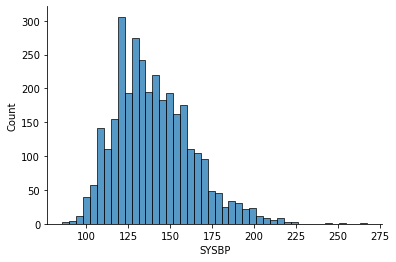

In [21]:
# Generate a histogram to see if the data is normally distributed
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df_3, x='SYSBP')
sns.despine()

#save the plot
plt.savefig("/content/figures/SYSBP_hisplot.pdf", bbox_inches='tight')

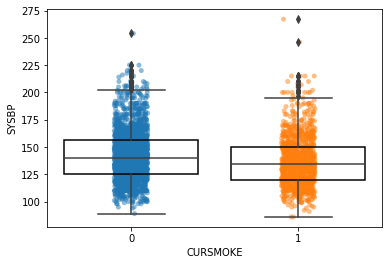

In [22]:
# Plot a box plot together with a strip plot to see the summary statistic and distribution 
sns.boxplot(data = df_3, x='CURSMOKE', y='SYSBP', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data = df_3, x='CURSMOKE', y='SYSBP', alpha=.5, zorder=0)

#save the plot
plt.savefig("/content/figures/SYSBP_Combined.pdf", bbox_inches='tight')

At first glance of the histogram plot, and the combined plot, we can see the data 'SYSBP' is not normally distributed, It's more like a positive skewed distribution.

In [23]:
# Import stats and test the normality of 'SYSBP', since it is continuos data
import scipy.stats as stats
stats.kstest(df_3['SYSBP'], 'norm') 

KstestResult(statistic=1.0, pvalue=0.0)

In [24]:
# Create each a new dataframe to store 'CURSMOKE=1' data, and 'CURSMOKE=0' data
df_Smoke = df_3.loc[df_3['CURSMOKE'] == 1]


#save the manipulated dataframe into the "results" subdirectory
df_Smoke.to_csv('/content/results/Smoke_df.csv')

df_Smoke

,RANDID,PERIOD,SEX,AGE,CURSMOKE,SYSBP,BMI,DEATH,ANGINA,HOSPMI,CVD
11,11252,3,2,58,1,155.0,24.61,0,0,0,0
19,12806,3,2,57,1,110.0,22.02,0,0,0,0
37,24721,3,2,51,1,141.0,24.77,1,0,0,0
41,33077,3,1,60,1,144.5,22.96,0,0,0,0
45,34689,3,2,49,1,163.0,31.45,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11586,9961615,3,1,58,1,174.0,23.65,0,0,0,0
11612,9989287,3,1,63,1,120.0,17.38,1,0,0,0
11615,9990894,3,2,60,1,205.0,22.37,1,0,0,0
11618,9993179,3,2,56,1,145.0,21.97,1,0,0,0


In [25]:
# Perform a normality test on the "SYSBP" data from the smokers, and plot the histogram as well.
stats.kstest(df_Smoke['SYSBP'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

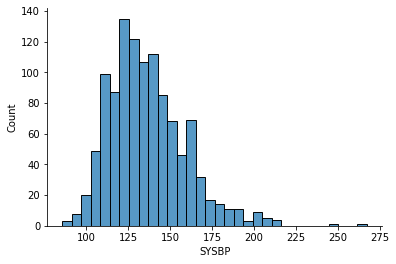

In [26]:
sns.histplot(data=df_Smoke, x='SYSBP')
sns.despine()

#save the plot
plt.savefig("/content/figures/SYSBP_smoke.pdf", bbox_inches='tight')

In [27]:
# Follow the same step to generate a new dataframe for non-smoker, and a histogram.
df_nonSmoke = df_3.loc[df_3['CURSMOKE'] == 0]


#save the manipulated dataframe into the "results" subdirectory
df_nonSmoke.to_csv('/content/results/nonSmoke_df.csv')

df_nonSmoke

,RANDID,PERIOD,SEX,AGE,CURSMOKE,SYSBP,BMI,DEATH,ANGINA,HOSPMI,CVD
4,6238,3,2,58,0,108.0,28.50,0,0,0,0
14,11263,3,2,55,0,180.0,31.17,0,0,0,1
22,14367,3,1,64,0,168.0,25.72,0,0,0,0
25,16365,3,1,55,0,173.0,29.11,0,0,0,0
28,16799,3,2,62,0,120.0,21.98,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11597,9969773,3,2,62,0,188.0,34.74,0,1,1,1
11600,9973350,3,2,63,0,160.0,25.60,1,0,0,0
11603,9978986,3,2,68,0,110.0,24.30,0,0,0,0
11606,9982118,3,1,70,0,163.5,25.26,1,0,0,1


In [28]:
stats.kstest(df_nonSmoke['SYSBP'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

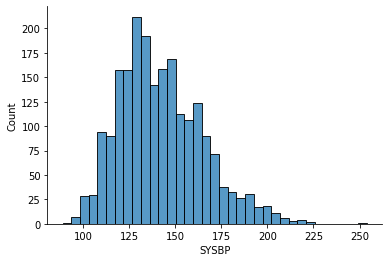

In [29]:
sns.histplot(data=df_nonSmoke, x='SYSBP')
sns.despine()

#save the plot
plt.savefig("/content/figures/SYSBP_nonsmoke.pdf", bbox_inches='tight')

# ***Based on the outputs from above, we can conclude that the SYSBP data from both smokers and non-smokers are not normally distributed, with p values both less than 0.01, we reject the null hypothesis.And we should perform non-parametric indepent samples test, namely Mann-Whitney U test to address our question.***

$$ H_0: M1 = M2 $$
$$ H_1: M1 > M2 $$

In [30]:
#Perform the Mann-Whitney U Test
stat, p_value = stats.mannwhitneyu(x = df_Smoke['SYSBP'],y = df_nonSmoke['SYSBP'], alternative = 'greater')
print(f"Mann-Whitney U Test Statistic: {stat}")
print(f"P-value: {p_value}")

#Level of significance is 0.05
alpha = 0.05

#Conclusion
if p_value < alpha:
  print('Reject Null Hypothesis (Significant different between two samples')
else:
    print('Do not reject Null Hypothesis(No significant between two samples)')

Mann-Whitney U Test Statistic: 999131.5
P-value: 0.9999999999999696
Do not reject Null Hypothesis(No significant between two samples)


# ***2. For this part, we want to analyze if smoking has an association with CVD***

$$ H_0: No\ association\ between\ smoking\ and\ CVD $$
$$ H_1: Association\ between\ smoking\ and\ CVD $$

In [31]:
# Create a matrix
contingencyTable = pd.crosstab(df_3.CURSMOKE,df.CVD,margins=True)
contingencyTable

CVD,0,1,All
CURSMOKE,,,
0,1635,493,2128
1,852,266,1118
All,2487,759,3246


In [32]:
#Perform Pearson Chi-square test
# Get table without totals
from scipy.stats import chi2_contingency
  
# defining the table
data = [[1635, 493], [852, 266]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.7216517872905039
Independent (H0 holds true)


###**Publication on GitHub**

Before git-push the whole repository to github, first download the ipynb file and upload it into the code directory

In [33]:
# download the file and upload it to code subdirectory

In [34]:
# add all the changes to a imaginary staging area



UsageError: %%bash is a cell magic, but the cell body is empty.


Generate a private SSH key for reuse.

install the key with the following code-block.

Generate and register a "keyhole" (public key).

verify the key-keyhole pair

Paste the code from the previous section to push the repository in this notebook to GitHub.

**do commit in order to successfully push it to the github repo**

Repo link:

#